*** Exoplanet detection ***

This notebook will explore datasets related to exoplanet detection, specifically the Kepler and TESS missions. We will use Python libraries such as Pandas, NumPy, Matplotlib, and Scikit-learn to analyze the data and build a machine learning model to classify potential exoplanets.

*Exploring the data*

In [13]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
path = r"C:\Users\matir\OneDrive\Documentos\NASA\Exoplanet detection using AI\data\cumulative_2025.10.04_05.21.55.csv"

df = pd.read_csv(
    path,
    comment='#',      # ignore metadata lines starting with '#'
    engine='python',  # more forgiving parser
)
df.head()


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [29]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(20)


In [30]:
df['koi_disposition'].value_counts()


koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

In [ ]:
# Establecemos un objetivo binario: 0 para 'CONFIRMED' y 1 para 'CANDIDATE'

df = df[df['koi_disposition'].isin(['CONFIRMED', 'CANDIDATE'])]
df['target'] = df['koi_disposition'].map({'CONFIRMED':0, 'CANDIDATE':1})

In [45]:
# Eliminar columnas irrelevantes
cols_drop = ['rowid','kepid','kepoi_name','kepler_name','koi_pdisposition','koi_score','koi_teq_err1','koi_teq_err2, koi_tce_delivname']
df = df.drop(columns=[c for c in cols_drop if c in df.columns])


Text(0.5, 1.0, 'Distribución de Confirmed vs Candidate')

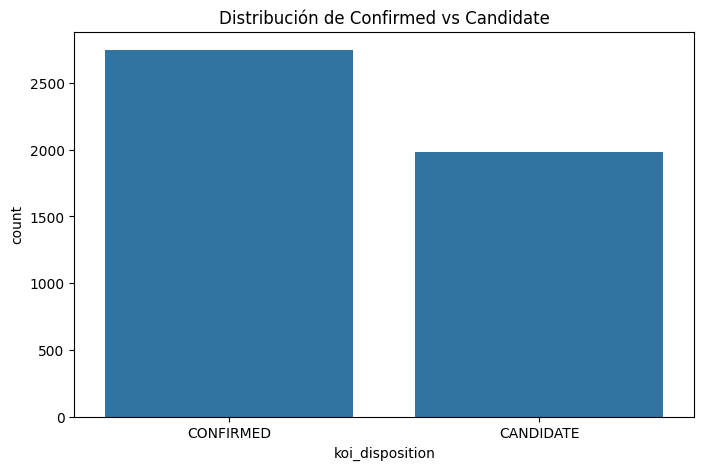

In [46]:
# Visualización de la distribución de las clases
plt.figure(figsize=(8,5))
sns.countplot(x='koi_disposition', data=df)
plt.title('Distribución de Confirmed vs Candidate')


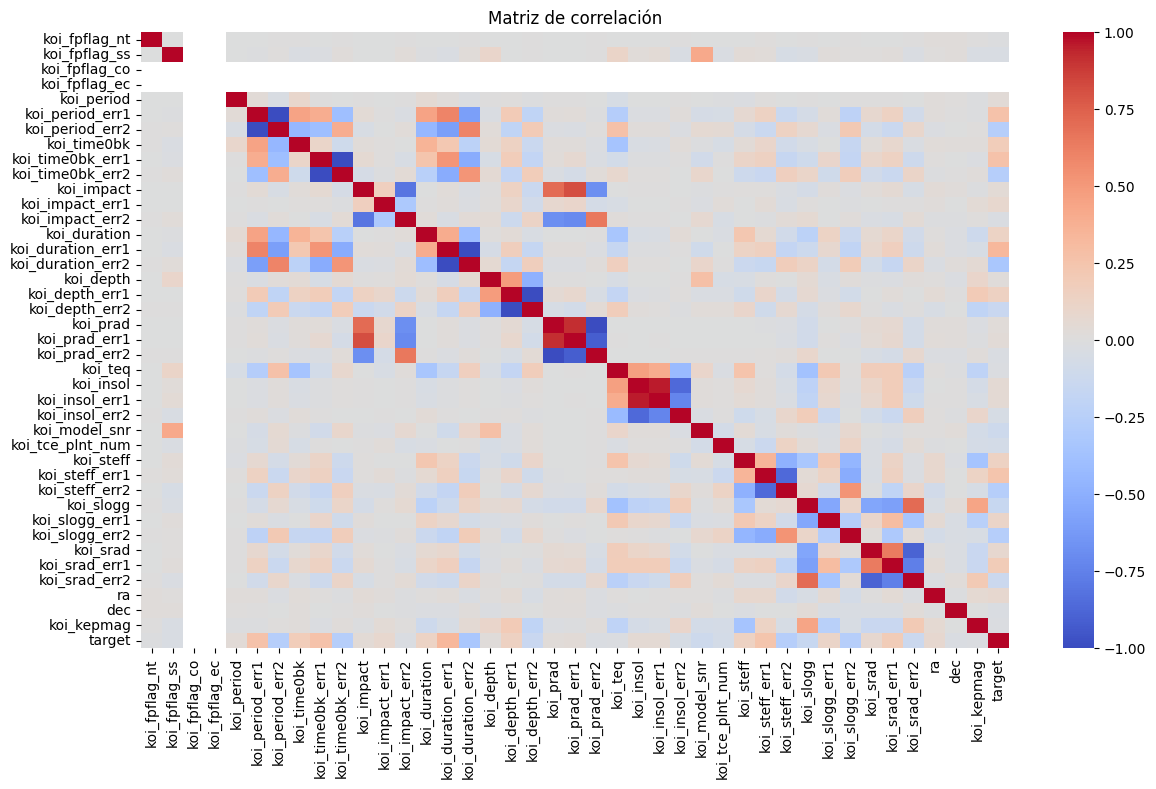

In [47]:
# matriz de correlación
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()


In [49]:
non_numeric_cols = X.select_dtypes(exclude=np.number).columns.tolist()
print(non_numeric_cols[:10])  # para ver algunas
# Si solo son IDs o etiquetas (p. ej. 'q1_q17_dr25_tce'), probablemente conviene droppearlas:
X = X.drop(columns=non_numeric_cols)  # si no aportan al modelo


['koi_tce_delivname']


In [ ]:
# Reemplazá NaN con la media
from sklearn.discriminant_analysis import StandardScaler

df = df.fillna(df.median(numeric_only=True))

# Split de features y target
X = df.drop(columns=['koi_disposition','target'])
y = df['target']

print(df.shape, X.shape, y.shape)

non_numeric_cols = X.select_dtypes(exclude=np.number).columns.tolist()
print(non_numeric_cols[:10])  # para ver algunas

# Si solo son IDs o etiquetas drop
X = X.drop(columns=non_numeric_cols)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


(4725, 43) (4725, 41) (4725,)
['koi_tce_delivname']
